In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd(),os.chdir(r'C:\Users\14049\WordAndStudy\Projects\学校\大三上\数字图像处理\数字图像处理实验材料\测试图像'),os.getcwd()

('C:\\Users\\14049\\WordAndStudy\\Projects\\JupyterNoteBook',
 None,
 'C:\\Users\\14049\\WordAndStudy\\Projects\\学校\\大三上\\数字图像处理\\数字图像处理实验材料\\测试图像')

In [ ]:
def cv2ImageShow(img):
    cv2.namedWindow('image',cv2.WINDOW_NORMAL)
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [310]:
def cv2ShowImages(imgs):
    for i,img in enumerate(imgs):
        cv2.namedWindow(str(i),cv2.WINDOW_NORMAL)
        cv2.imshow(str(i),img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 对比度,亮度调整

In [329]:
cat = cv2.imread(r'./lena.bmp',0)

In [330]:
cat.size,cat.shape,cat[0,0],dcat.dtype

(262144, (512, 512), 162, dtype('uint8'))

In [362]:
dcat = cat*1.5
dcat = np.clip(dcat,a_min=0,a_max=255)
dcat = dcat.astype('uint8')

lcat = cat+25
lcat = np.clip(lcat,a_min=0,a_max=254)
lcat = lcat.astype('uint8')

cv2ShowImages([cat,dcat,lcat])

# 灰度图像 直方图均衡化

In [337]:
grayImg = cv2.imread(r'lena256gray.jpg',0)

In [338]:
grayhist = cv2.calcHist([grayImg],[0],None,[256],[0,256])

In [339]:
cumGrayHist = np.cumsum(grayhist)

In [341]:
grayImgList = grayImg.tolist()

In [343]:
w,h = grayImg.shape
M = w*h
K = 256
for v in range(h):
    for u in range(w):
        a = grayImgList[v][u]
        b = (cumGrayHist[a]*(K-1))//M
        grayImgList[v][u] = b

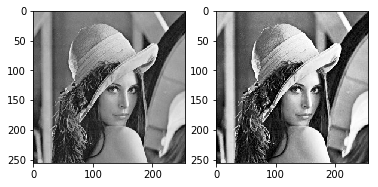

In [346]:
plt.subplot(121)
plt.imshow(grayImg,cmap='gray')
plt.subplot(122)
plt.imshow(grayImgList,cmap='gray')
plt.show()

In [349]:
def calcHist(imgList):
    h = [0]*256
    rl = len(imgList)
    cl = len(imgList[0])
    for ri in range(rl):
        for ci in range(cl):
            h[int(imgList[ri][ci])]+=1
    return h


In [350]:
changedHist = calcHist(grayImgList)
changedCumHIst = np.cumsum(changedHist)

In [355]:
%matplotlib
plt.subplot(221)
plt.imshow(grayImg,cmap='gray')
plt.subplot(222)
plt.imshow(grayImgList,cmap='gray')

plt.subplot(223)
plt.plot(cumGrayHist)
plt.title('orgian')
plt.subplot(224)
plt.title('modified')
plt.plot(changedCumHIst)

plt.show()

Using matplotlib backend: TkAgg


# alpha 混合

In [334]:
img1 = cv2.imread(r'./WindowsLogo.bmp')
img2 = cv2.imread(r'./LinuxLogo.bmp')
img1.shape,img2.shape

((360, 480, 3), (360, 480, 3))

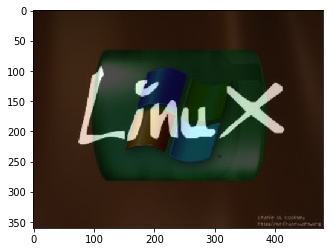

In [335]:
i = 0.3
res = cv2.addWeighted(img1, i, img2, (1 - i), 0)
plt.imshow(res);plt.show()

In [336]:
cv2ShowImages([img1,img2,res])

# 自动对比度调整

In [289]:
img3 = cv2.imread(r'./wom256gray.bmp',0)

In [290]:
ahigh,alow = np.max(img3),np.min(img3)

In [291]:
amin = 0
amax = 255
cImg3= (img3-alow)*((amax-amin)/(ahigh-alow))

In [303]:
cv2.namedWindow('image1',cv2.WINDOW_NORMAL)
cv2.imshow('image1',img3)
cv2.namedWindow('image2',cv2.WINDOW_NORMAL)
cv2.imshow('image2',cImg3.astype('uint8'))
cv2.waitKey(0)
cv2.destroyAllWindows()

# 展示

In [161]:
from PIL import Image
from PIL import ImageEnhance

In [162]:
#原始图像
image = Image.open('cat256gray.png')
image.show()

In [177]:
#对比度增强
enh_con = ImageEnhance.Contrast(image)
contrast = 1.5
image_contrasted = enh_con.enhance(contrast)
image_contrasted.show()
image.close()